## Set Up

In [190]:
## Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
## Read CSV
df = pd.read_csv('dataset_2025.csv')
df

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,...,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,...,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
1,6,11,228,5,390,4,63,3,0.534,-0.562563,...,NaN,NaN,59.013134,65.657938,5.047566,0,1___1,1___2,0,first
2,7,8,415,4,415,4,143,3,1.266,1.598751,...,NaN,NaN,61.037489,64.429134,2.719261,0,123_1,____3,0,out
3,8,8,308,1,308,1,143,3,1.800,25.403185,...,NaN,NaN,63.142075,65.648720,2.069797,0,____1,____2,0,out
4,10,1,314,4,300,6,514,3,0.733,8.957441,...,NaN,NaN,59.770395,64.046058,3.890504,0,123_1,____3,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33189,1,300,6,187,4,63,3,0.567,-0.706883,...,-32.706535,8.013511,61.579339,66.498556,3.523959,0,123_1,1_3_2,1,first
19996,33190,1,768,7,768,7,63,3,1.134,-72.726998,...,-30.850832,11.182392,60.859688,61.483396,3.518128,0,1___0,1___1,0,out
19997,33192,1,63,3,300,6,63,3,1.266,7.741671,...,NaN,NaN,59.986376,65.275522,4.002790,0,1___1,____3,0,out
19998,33193,15,713,4,713,4,313,3,1.200,65.300092,...,NaN,NaN,60.946962,64.565955,2.847538,0,____2,____3,0,out


# Question 1
## Which 5 infielders had the quickest exchange times on throws to first base?

### This dataset has some values of exchange times that are faster than humanly possible.  So I implemented a threshold to easily change based on whatever filtering is decided

In [30]:
## Threshold
threshold = 0.1

In [208]:
## Getting essential columns
q1_df = df[['thrower_id', 'exchange_time']]
## Dropping nulls
q1_df = q1_df.dropna()
## Filtering out the threshold
q1_df = q1_df.loc[q1_df['exchange_time'] >= threshold]
## Sorting and getting the top 5
q1_df = q1_df.sort_values(['exchange_time']).head(5)

count = 1
## Printing result
print(f'Top 5 quickest Exchange Times on throws to first base (Threshold >= {threshold}s):')
for index, row in q1_df.iterrows():
    print(f'{count}. Fielder #{int(row['thrower_id'])} - Exchange Time: {row['exchange_time']}s')
    count += 1

Top 5 quickest Exchange Times on throws to first base (Threshold >= 0.1s):
1. Fielder #351 - Exchange Time: 0.1s
2. Fielder #512 - Exchange Time: 0.133s
3. Fielder #377 - Exchange Time: 0.133s
4. Fielder #454 - Exchange Time: 0.166s
5. Fielder #112 - Exchange Time: 0.167s


### Below is also the way to get the top 5 averages of exchange times

In [55]:
## A similar threshold will be implimented for minimum amount of throws
minimum_throws = 2

In [56]:
## Getting essential columns
q1_avg_df = df[['thrower_id', 'exchange_time']]
## Adding minimum throws
q1_avg_df = q1_avg_df.groupby('thrower_id').filter(lambda x: len(x) >= minimum_throws)
## Getting averge, sorting, and getting top 5
q1_avg_df = q1_avg_df.groupby(['thrower_id']).mean().sort_values(['exchange_time']).reset_index().head(5)

count = 1
## Printing result
print(f'Top 5 average quickest Exchange Times on throws to first base (Minimum Throws >= {minimum_throws}):')
for index, row in q1_avg_df.iterrows():
    print(f'{count}. Fielder #{int(row['thrower_id'])} - Average Exchange Time: {row['exchange_time']:.3f}s')
    count += 1

Top 5 average quickest Exchange Times on throws to first base (Minimum Throws >= 2):
1. Fielder #477 - Average Exchange Time: 0.334s
2. Fielder #23 - Average Exchange Time: 0.384s
3. Fielder #799 - Average Exchange Time: 0.433s
4. Fielder #280 - Average Exchange Time: 0.444s
5. Fielder #414 - Average Exchange Time: 0.450s


# Question 2
## The infield coach wants to see which teams made the most errant throws to first base. An errant throw is described as a throw that bounced and resulted in the runner being safe. Please create a basic visual that you would present to the infield coach to present your findings.

In [75]:
## Sicne the only way to get a value in the 'bouce_pos' metrics is a ball bouncing, the null values in that column can be filtered out
q2_df = df[['team_id', 'bounce_pos_x', 'batter_result']]
## Dropping rows that dont have a bounce
q2_df = q2_df.dropna(subset=['bounce_pos_x'])
## Filtering out the situations where the runner is not safe
q2_df = q2_df.loc[q2_df['batter_result'] != 'out']
## Counting and sorting
q2_df = q2_df.value_counts(['team_id']).reset_index().sort_values(['count'], ascending=False)

/var/folders/nw/kgb_dv2142z7fzckw0l17bm80000gp/T/ipykernel_17477/585872858.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')


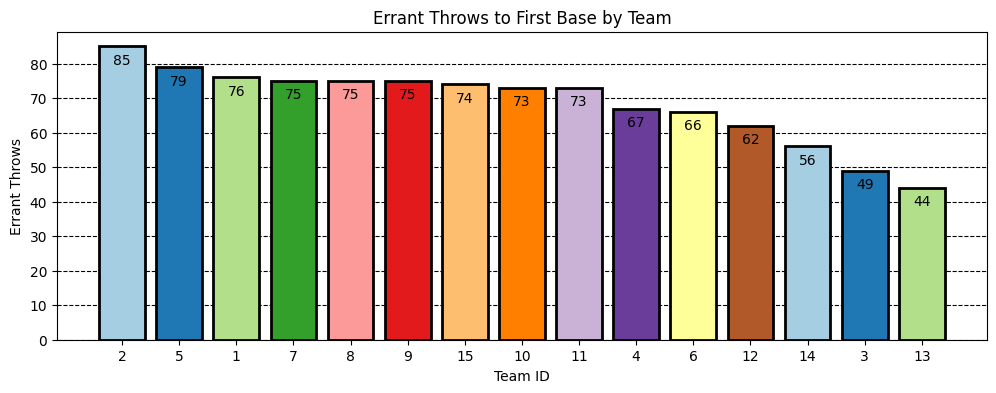

In [185]:
## Bar Graph
fig, ax = plt.subplots(figsize=(12, 4), linewidth=2)

## Changing team_id to str type so it isnt continuous
q2_df['team_id'] = q2_df['team_id'].astype(str)

## x, y
teams = q2_df['team_id']
counts = q2_df['count']


cmap = plt.cm.get_cmap('Paired')
colors = [cmap(i % cmap.N) for i in range(len(teams))]


## Bar creation
bar = ax.bar(teams, counts, color=colors, edgecolor='#000000', linewidth=2, zorder=3, align='center')
ax.bar_label(bar, color='#000000', padding=-15)

## Labels
ax.set_xlabel('Team ID')
ax.set_ylabel('Errant Throws')
ax.set_title('Errant Throws to First Base by Team')
ax.grid(color='#000000', zorder=0, axis='y', linestyle='--')

plt.show()

#### **Team 2 has the highest amount of errant throws**
#### The colors of the bars could be chagned if I knew what each team was. Logos can also be added for quicker interpretation

# Question 3
## Looking at all infield throws to first base, given that the distance of the throw to first base was in the top 90th percentile, what team had the best average exchange time? Which team had the largest variation in exchange time on these throws?

In [212]:
q3_df = df[['team_id', 'thrower_id', 'throw_pos_x', 'throw_pos_y', 'receiver_pos_x', 'receiver_pos_y', 'exchange_time']]
## Dropping nulls
q3_df = q3_df.dropna()
## Getting the distance between the throw and receiver and putting it into percentiles
q3_df['distance'] = ((q3_df['receiver_pos_x'] - q3_df['throw_pos_x']) ** 2 + (q3_df['receiver_pos_y'] - q3_df['throw_pos_y']) ** 2) ** 0.5
q3_df['distance_pct'] = q3_df['distance'].rank(pct=True)

In [213]:
## Filtering for 90th percnetile and above
q3_df = q3_df.loc[q3_df['distance_pct'] >= 0.90]
q3_df = q3_df[['team_id', 'exchange_time']]

In [214]:
## Grouping and sorting by team for best average estimated time
q3_best_avg_et = q3_df.groupby(['team_id']).mean().reset_index().sort_values(['exchange_time']).reset_index()

## Grouping and sorting by variance 
q3_et_var = q3_df[['team_id', 'exchange_time']].groupby(['team_id']).var().sort_values(['exchange_time'], ascending=False).reset_index()

In [215]:
## Displaying results
best_avg_et_team = int(q3_best_avg_et.iloc[0]['team_id'])
best_avg_et_time = q3_best_avg_et.iloc[0]['exchange_time']
print(f'Team with Best Average Exchange Time: {best_avg_et_team} ({round(best_avg_et_time, 3)}s)')

largest_var_team = int(q3_et_var.iloc[0]['team_id'])
largest_var_time = q3_et_var.iloc[0]['exchange_time']
print(f'Team with the Largest Variance: {largest_var_team} ({round(largest_var_time, 3)}s)')

Team with Best Average Exchange Time: 9 (1.133s)
Team with the Largest Variance: 15 (0.285s)


# Question 4
## Given that a throw was made less than 100 feet from first base, is there a correlation between throw velocity and throw distance? Provide a basic visual alongside a brief explanation.

In [245]:
## Calculating distance and speed
q4_df = df[['receiver_pos_x', 'receiver_pos_y', 'throw_pos_x', 'throw_pos_y', 'throw_velo_x', 'throw_velo_y', 'throw_velo_z']]
## Dropping nulls
q4_df = q4_df.dropna()
q4_df['distance'] = ((q4_df['receiver_pos_x'] - q4_df['throw_pos_x']) ** 2 + (q4_df['receiver_pos_y'] - q4_df['throw_pos_y']) ** 2) ** 0.5
q4_df['throw_velocity'] = ((q4_df['throw_velo_x']) ** 2 + (q4_df['throw_velo_y']) ** 2 + (q4_df['throw_velo_z']) ** 2) ** 0.5
## Filtering for throws made less than 100 feet
graph1 = q4_df.loc[q4_df['distance'] < 100]

In [246]:
## Getting correlation coeficient
correlation_coef = graph1[['distance', 'throw_velocity']].corr()['distance'].iloc[1]

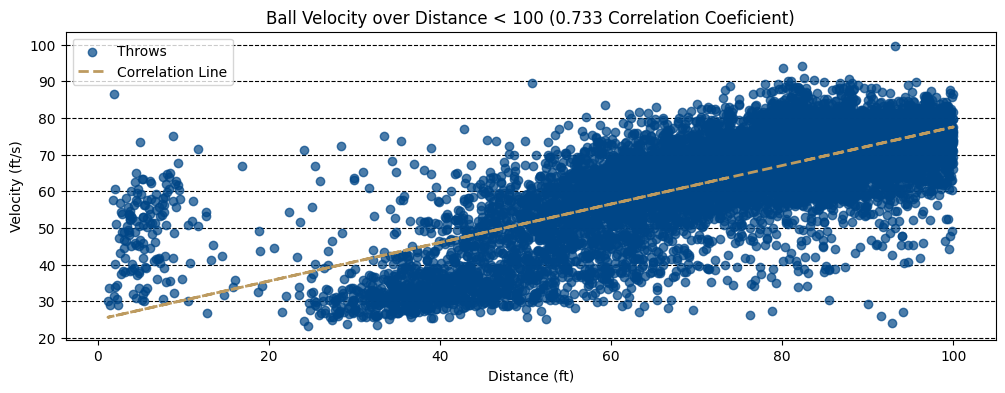

In [247]:
## Bar Graph
fig, ax = plt.subplots(figsize=(12, 4), linewidth=2)

## x, y
distance = graph1['distance']
throw_velocity = graph1['throw_velocity']

## Scatter creation
ax.scatter(distance, throw_velocity, c='#004687', alpha=0.7, zorder=3, label='Throws')

## Fitting and plotting a line to the data
coefficients = np.polyfit(distance, throw_velocity, 1)
best_fit_line = np.poly1d(coefficients)
ax.plot(distance, best_fit_line(distance), label='Correlation Line', color='#BD9B60', linewidth=2, zorder=3)

## Labels
ax.set_xlabel('Distance (ft)')
ax.set_ylabel('Velocity (ft/s)')
ax.set_title(f'Ball Velocity over Distance < 100 ({round(correlation_coef, 3)} Correlation Coeficient)')
ax.grid(color='#000000', zorder=0, axis='y', linestyle='--')
ax.legend()


plt.show()

#### There is a close to a strong positive correlation (0.73) between Velocity and Throw Distance. However, looking at this graph, you can see that past 20 feet, the correlation is more pronounced

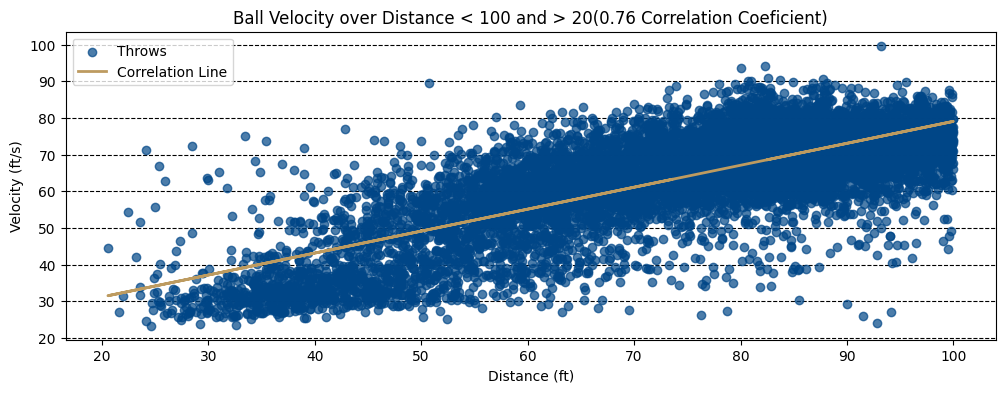

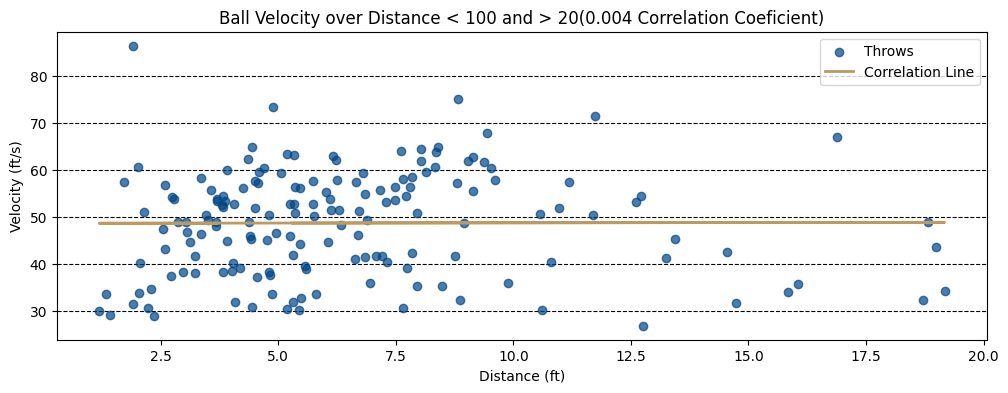

In [ ]:
## Doing the same process excecpt with different bounds

## Filtering
graph2 = q4_df.loc[(q4_df['distance'] < 100) & (q4_df['distance'] > 20)]
## Getting correlation coeficient
correlation_coef = graph2[['distance', 'throw_velocity']].corr()['distance'].iloc[1]
## Bar Graph
fig, ax = plt.subplots(figsize=(12, 4), linewidth=2)
## x, y
distance = graph2['distance']
throw_velocity = graph2['throw_velocity']
## Scatter creation
ax.scatter(distance, throw_velocity, c='#004687', alpha=0.7, zorder=3, label='Throws')
## Fitting and plotting a line to the data
coefficients = np.polyfit(distance, throw_velocity, 1)
best_fit_line = np.poly1d(coefficients)
ax.plot(distance, best_fit_line(distance), label='Correlation Line', color='#BD9B60', linewidth=2, zorder=3)
## Labels
ax.set_xlabel('Distance (ft)')
ax.set_ylabel('Velocity (ft/s)')
ax.set_title(f'Ball Velocity over Distance < 100 and > 20 ({round(correlation_coef, 3)} Correlation Coeficient)')
ax.grid(color='#000000', zorder=0, axis='y', linestyle='--')
ax.legend()
plt.show()

## Filtering
graph3 = q4_df.loc[(q4_df['distance'] < 20)]
## Getting correlation coeficient
correlation_coef = graph3[['distance', 'throw_velocity']].corr()['distance'].iloc[1]
## Bar Graph
fig, ax = plt.subplots(figsize=(12, 4), linewidth=2)
## x, y
distance = graph3['distance']
throw_velocity = graph3['throw_velocity']
## Scatter creation
ax.scatter(distance, throw_velocity, c='#004687', alpha=0.7, zorder=3, label='Throws')
## Fitting and plotting a line to the data
coefficients = np.polyfit(distance, throw_velocity, 1)
best_fit_line = np.poly1d(coefficients)
ax.plot(distance, best_fit_line(distance), label='Correlation Line', color='#BD9B60', linewidth=2, zorder=3)
## Labels
ax.set_xlabel('Distance (ft)')
ax.set_ylabel('Velocity (ft/s)')
ax.set_title(f'Ball Velocity over Distance < 100 and > 20 ({round(correlation_coef, 3)} Correlation Coeficient)')
ax.grid(color='#000000', zorder=0, axis='y', linestyle='--')
ax.legend()
plt.show()

#### Eliminating the throws under 20 yards, it is observed that the correlation coeficient (0.76) is stronger and and the throws under 20 feet have no correlation (0.004) between distance and velocity 